# Offshore CIOPS Quantitative Runs

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(mydata, section, starttime, endtime):
    lons = mydata.final_lon[(mydata.final_section==section) & (mydata.init_t==time)]
    lats = mydata.final_lat[(mydata.final_section==section) & (mydata.init_t==time)]
    depths = depthf(mydata.final_z[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    transports = mydata.final_transp[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.final_temp[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    sal = mydata.final_salt[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    return lons, lats, depths, transports, temp, sal

## summer 2017

In [4]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

In [5]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [6]:
meander = 0
init = 1
Nshelf = 2
Nslope = 5
Sshelf = 6
Sslope = 4
offshore = 3
sections = [Nshelf, Nslope, Sshelf, Sslope, offshore]
sec_name = ['north shelf', 'north slope', 'south shelf', 'south slope', 'offshore']

In [7]:
apr = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1) for sec in sections]
may = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1) for sec in sections]
jun = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1) for sec in sections]
jul = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1) for sec in sections]
aug = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1) for sec in sections]
sep = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1) for sec in sections]

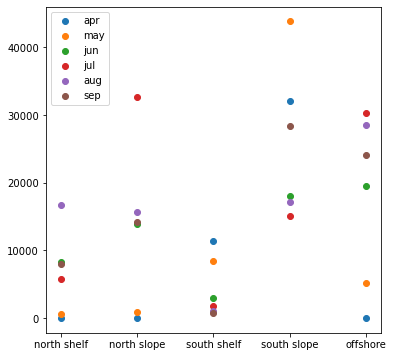

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter(sec_name, apr, label='apr')
ax.scatter(sec_name, may, label='may')
ax.scatter(sec_name, jun, label='jun')
ax.scatter(sec_name, jul, label='jul')
ax.scatter(sec_name, aug, label='aug')
ax.scatter(sec_name, sep, label='sep')
ax.legend(loc='upper left')

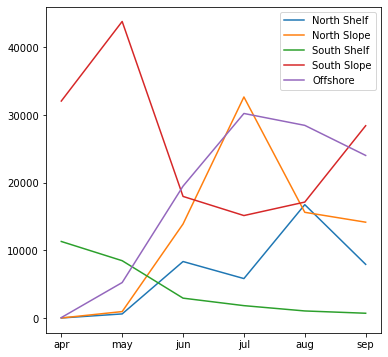

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.plot(mon, [apr[0], may[0], jun[0], jul[0], aug[0], sep[0]], label='North Shelf')
ax.plot(mon, [apr[1], may[1], jun[1], jul[1], aug[1], sep[1]], label='North Slope')
ax.plot(mon, [apr[2], may[2], jun[2], jul[2], aug[2], sep[2]], label='South Shelf')
ax.plot(mon, [apr[3], may[3], jun[3], jul[3], aug[3], sep[3]], label='South Slope')
ax.plot(mon, [apr[4], may[4], jun[4], jul[4], aug[4], sep[4]], label='Offshore')
ax.legend(loc='upper right')

## winter 2017/18

In [11]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [12]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [14]:
octo = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1) for sec in sections]
nov = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1) for sec in sections]
dec = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1) for sec in sections]
jan = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1) for sec in sections]
feb = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1) for sec in sections]
mar = [np.sum(data.final_transp[(data.final_section==sec) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1) for sec in sections]

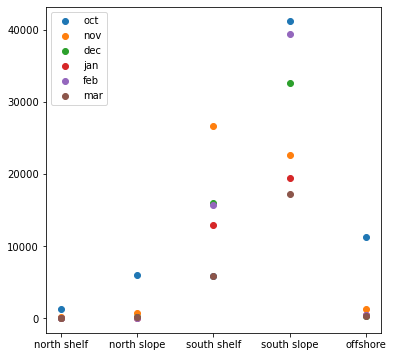

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter(sec_name, octo, label='oct')
ax.scatter(sec_name, nov, label='nov')
ax.scatter(sec_name, dec, label='dec')
ax.scatter(sec_name, jan, label='jan')
ax.scatter(sec_name, feb, label='feb')
ax.scatter(sec_name, mar, label='mar')
ax.legend(loc='upper left')

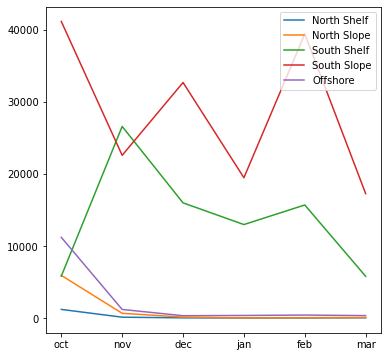

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.plot(mon, [octo[0], nov[0], dec[0], jan[0], feb[0], mar[0]], label='North Shelf')
ax.plot(mon, [octo[1], nov[1], dec[1], jan[1], feb[1], mar[1]], label='North Slope')
ax.plot(mon, [octo[2], nov[2], dec[2], jan[2], feb[2], mar[2]], label='South Shelf')
ax.plot(mon, [octo[3], nov[3], dec[3], jan[3], feb[3], mar[3]], label='South Slope')
ax.plot(mon, [octo[4], nov[4], dec[4], jan[4], feb[4], mar[4]], label='Offshore')
ax.legend(loc='upper right')

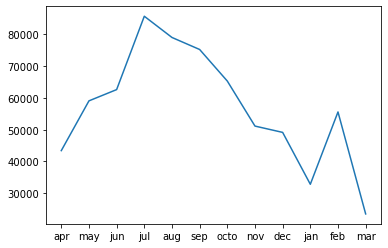

In [17]:
# total transport
plt.plot(['apr','may','jun','jul','aug','sep','octo','nov','dec','jan','feb','mar'],[sum(apr),sum(may),sum(jun),sum(jul),sum(aug),sum(sep),sum(octo),sum(nov),sum(dec),sum(jan),sum(feb),sum(mar)])

In [18]:
# NEXT - transport weighted histograms of the tracers

In [19]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

Fapr = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])/(sum_end[0]-sum_start[0]+1)
Fmay = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])/(sum_end[1]-sum_start[1]+1)
Fjun = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])/(sum_end[2]-sum_start[2]+1)
Fjul = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])/(sum_end[3]-sum_start[3]+1)
Faug = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])/(sum_end[4]-sum_start[4]+1)
Fsep = (data.final_transp[(data.final_section != 0) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])/(sum_end[5]-sum_start[5]+1)

Sapr = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])
Smay = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])
Sjun = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])
Sjul = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])
Saug = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])
Ssep = (data.final_salt[(data.final_section != 0) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])

Tapr = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[0]) & (data.init_t <= sum_end[0])])
Tmay = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[1]) & (data.init_t <= sum_end[1])])
Tjun = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[2])])
Tjul = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[3]) & (data.init_t <= sum_end[3])])
Taug = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[4]) & (data.init_t <= sum_end[4])])
Tsep = (data.final_temp[(data.final_section != 0) & (data.init_t >= sum_start[5]) & (data.init_t <= sum_end[5])])

In [22]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

Foct = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])/(win_end[0]-win_start[0]+1)
Fnov = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])/(win_end[1]-win_start[1]+1)
Fdec = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])/(win_end[2]-win_start[2]+1)
Fjan = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])/(win_end[3]-win_start[3]+1)
Ffeb = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])/(win_end[4]-win_start[4]+1)
Fmar = (data.final_transp[(data.final_section != 0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])/(win_end[5]-win_start[5]+1)

Soct = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])
Snov = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])
Sdec = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])
Sjan = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])
Sfeb = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])
Smar = (data.final_salt[(data.final_section != 0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])

Toct = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[0])])
Tnov = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[1]) & (data.init_t <= win_end[1])])
Tdec = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[2])])
Tjan = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[3]) & (data.init_t <= win_end[3])])
Tfeb = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[4]) & (data.init_t <= win_end[4])])
Tmar = (data.final_temp[(data.final_section != 0) & (data.init_t >= win_start[5]) & (data.init_t <= win_end[5])])

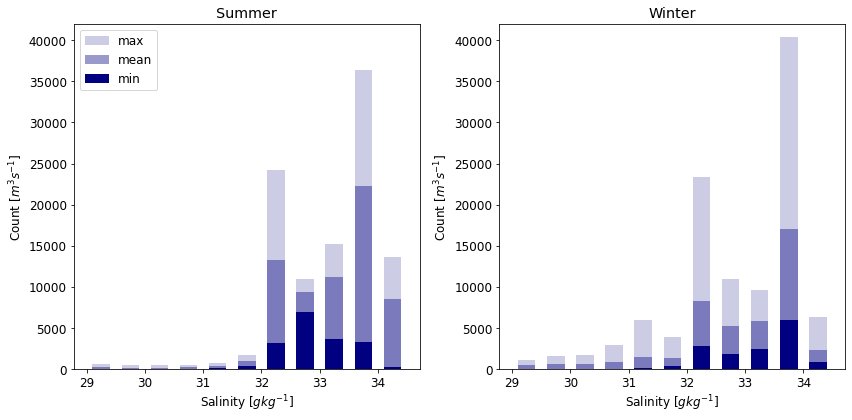

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
plt.rcParams['font.size'] = 12
#plt summer
sum_sal,x,_ = ax[0].hist([Sapr, Smay, Sjun, Sjul, Saug, Ssep], bins=np.arange(29,35,0.5), weights= [Fapr, Fmay, Fjun, Fjul, Faug, Fsep],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(sum_sal,axis=0)
mini = np.min(sum_sal,axis=0)
maxi = np.max(sum_sal,axis=0)

ax[0].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[0].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[0].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[0].set_title('Summer')
ax[0].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[0].set_xlabel('Salinity [$g kg^{-1}$]')
ax[0].set_ylim([0,42000])
ax[0].legend()

#plt winter
win_sal,x,_ = ax[1].hist([Soct, Snov, Sdec, Sjan, Sfeb, Smar], bins=np.arange(29,35,0.5), weights= [Foct, Fnov, Fdec, Fjan, Ffeb, Fmar],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_sal,axis=0)
mini = np.min(win_sal,axis=0)
maxi = np.max(win_sal,axis=0)

ax[1].bar(bin_centers,maxi,width = 0.3,color='navy',alpha=0.2,label='max')
ax[1].bar(bin_centers,mean,width = 0.3, color='navy',alpha=0.4,label='mean')
ax[1].bar(bin_centers, mini,width = 0.3, color='navy',label='min')

ax[1].set_title('Winter')
ax[1].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[1].set_xlabel('Salinity [$g kg^{-1}$]')
ax[1].set_ylim([0,42000])
# ax[1].legend()

plt.tight_layout()

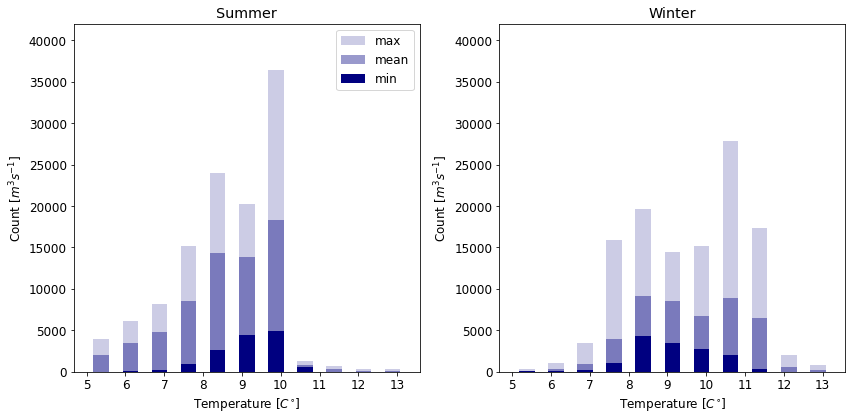

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
plt.rcParams['font.size'] = 12
#plt summer
sum_tem,x,_ = ax[0].hist([Tapr, Tmay, Tjun, Tjul, Taug, Tsep], bins=np.arange(5,14,0.75), weights= [Fapr, Fmay, Fjun, Fjul, Faug, Fsep],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(sum_tem,axis=0)
mini = np.min(sum_tem,axis=0)
maxi = np.max(sum_tem,axis=0)

ax[0].bar(bin_centers,maxi,width = 0.4,color='navy',alpha=0.2,label='max')
ax[0].bar(bin_centers,mean,width = 0.4, color='navy',alpha=0.4,label='mean')
ax[0].bar(bin_centers, mini,width = 0.4, color='navy',label='min')

ax[0].set_title('Summer')
ax[0].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[0].set_xlabel('Temperature [$C^{\circ}$]')
ax[0].set_ylim([0,42000])
ax[0].legend()

#plt winter
win_tem,x,_ = ax[1].hist([Toct, Tnov, Tdec, Tjan, Tfeb, Tmar], bins=np.arange(5,14,0.75), weights= [Foct, Fnov, Fdec, Fjan, Ffeb, Fmar],alpha=0)
bin_centers = 0.5*(x[1:]+x[:-1])

mean = np.mean(win_tem,axis=0)
mini = np.min(win_tem,axis=0)
maxi = np.max(win_tem,axis=0)

ax[1].bar(bin_centers,maxi,width = 0.4,color='navy',alpha=0.2,label='max')
ax[1].bar(bin_centers,mean,width = 0.4, color='navy',alpha=0.4,label='mean')
ax[1].bar(bin_centers, mini,width = 0.4, color='navy',label='min')

ax[1].set_title('Winter')
ax[1].set_ylabel('Count [$m^{3}s^{-1}$]')
ax[1].set_xlabel('Temperature [$C^{\circ}$]')
ax[1].set_ylim([0,42000])
# ax[1].legend()

plt.tight_layout()